In [1]:
import os
import glob
import numpy as np

import pandas as pd
import dill as pkl

In [13]:
import analyze2p.utils as hutils
import analyze2p.aggregate_datasets as aggr

In [53]:
rootdir = '/n/coxfs01/2p-data'
traceid='traces001'
dk = '20190522_JC084_fov1'
experiment = 'gratings'

responsive_test='nstds'
responsive_thr=10.
response_type='dff'
session, animalid, fovnum = hutils.split_datakey_str(dk)


In [11]:

data_fpath = glob.glob(os.path.join(rootdir, animalid, session, 'FOV%i_*' % fovnum,
                      'combined_%s*' % experiment, 'traces/%s*' % traceid, 
                        'data_arrays', 'np_subtracted.npz'))[0]
data_fpath

'/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/combined_gratings_static/traces/traces001_55a5cc_traces001_7eef99_traces001_809b80_traces001_fbc03e/data_arrays/np_subtracted.npz'

In [14]:
raw_traces, labels, sdf, run_info = aggr.load_dataset(data_fpath, trace_type='corrected')

In [127]:
importlib.reload(aggr)

<module 'analyze2p.aggregate_datasets' from '/home/julianarhee/Repositories/rat-2p-area-characterizations/analyze2p/aggregate_datasets.py'>

In [128]:
processed, metrics = aggr.process_traces(raw_traces, labels, trace_type='dff', 
                    response_type='dff', trial_epoch='stimulus')
 

--- processed traces: dff


In [16]:
df = group_roidata_stimresponse(raw_traces, labels)


In [75]:
df_f = aggr.traces_to_trials(processed, labels, epoch='stimulus', metric='mean')
df_f.head()

Index(['config', 'frame', 'stim_dur', 'trial', 'tsec', 'stim_on_frame',
       'nframes_on', 'run_ix', 'file_ix'],
      dtype='object')


,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,config
1,-0.034201,0.021430,0.018510,-0.001230,0.009443,0.001101,-0.001623,0.002729,-0.010159,0.052075,...,0.105538,0.027395,-0.031355,-0.017027,0.088082,0.093967,0.062548,0.077281,-0.012249,config024
2,-0.000298,0.012558,0.022888,0.015827,-0.006928,0.000041,0.026671,-0.016545,0.020875,-0.013182,...,-0.009583,0.084435,-0.012729,-0.031715,0.278464,0.017477,0.020814,0.045543,0.023125,config040
3,-0.014288,0.033190,0.006000,0.017448,0.019502,-0.001342,-0.013979,0.015189,-0.007862,0.010767,...,-0.024127,-0.021860,0.041583,-0.008353,-0.035208,-0.006917,0.022033,0.047116,0.050532,config016
4,-0.004947,0.019204,0.007802,0.030336,0.002694,0.017858,-0.006881,0.007996,-0.027107,0.003737,...,-0.022618,-0.025045,-0.045030,-0.065045,0.002685,-0.073955,-0.071496,-0.009591,0.003497,config048
5,-0.025036,0.003435,-0.016004,-0.015405,0.054791,-0.058130,-0.003716,-0.011494,-0.025311,0.020794,...,-0.002534,0.001953,0.038382,-0.051967,0.130947,0.020442,0.021518,0.037103,0.042712,config006


In [132]:
%matplotlib notebook

<IPython.core.display.Javascript object>


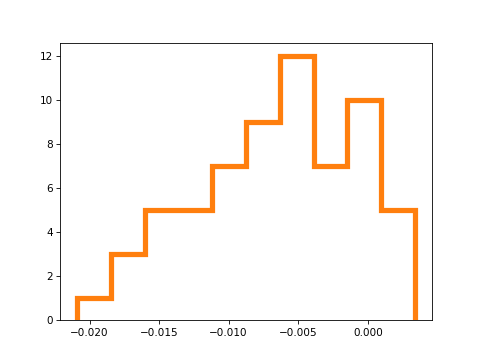

(array([ 1.,  3.,  5.,  5.,  7.,  9., 12.,  7., 10.,  5.]),
 array([-0.02090488, -0.01847502, -0.01604515, -0.01361529, -0.01118542,
        -0.00875555, -0.00632569, -0.00389582, -0.00146596,  0.00096391,
         0.00339378]),
 [<matplotlib.patches.Polygon at 0x7fa36254c590>])

In [134]:
fig, ax = pl.subplots()
ax.hist(df_f[[0, 'config']].groupby(['config']).mean(), color='r', lw=2,
        histtype='step', label='mean of dff traces (traces_to_trials)')
ax.hist(metrics[[0, 'config']].groupby(['config']).mean(), 
        histtype='step', label='process_traces', lw=3)
ax.hist(df.get_group(0)[['config', 'dff']].groupby(['config']).mean()
        , histtype='step', label='grouped', lw=5)


<IPython.core.display.Javascript object>


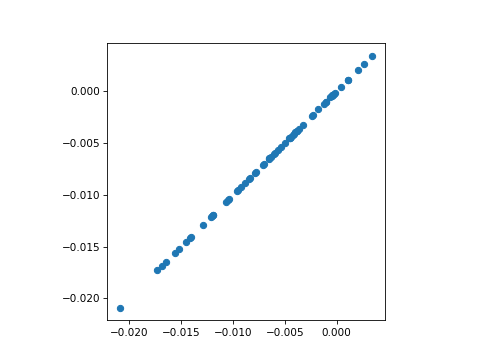

In [138]:
fig, ax = pl.subplots()
ax.scatter(df.get_group(0)[['config', 'dff']].groupby(['config']).mean(),
           metrics[[0, 'config']].groupby(['config']).mean())
ax.set_aspect('equal')

In [50]:
import importlib

In [64]:
importlib.reload(aggr)

<module 'analyze2p.aggregate_datasets' from '/home/julianarhee/Repositories/rat-2p-area-characterizations/analyze2p/aggregate_datasets.py'>

In [65]:
df2 = aggr.get_neuraldf(dk, experiment, traceid=traceid,
                       responsive_test=responsive_test, responsive_thr=responsive_thr,
                        response_type=response_type)

In [66]:
[df2[['config', 'trial', roi]] for roi in ]

,0,5,9,11,12,14,16,17,19,25,...,235,236,237,241,242,246,247,255,258,config
1,-0.034201,0.001101,0.052075,0.125646,0.015481,0.031394,0.051106,0.191647,0.038264,0.059604,...,0.032520,-0.059688,-0.034752,0.026568,0.029945,0.144001,-0.048519,0.088082,0.077281,config024
2,-0.000298,0.000041,-0.013182,0.118458,0.057846,0.037593,0.051451,0.250984,0.060692,0.031079,...,-0.020103,-0.035330,-0.065533,0.054412,-0.008612,0.079451,0.009216,0.278464,0.045543,config040
3,-0.014288,-0.001342,0.010767,0.069912,0.057118,-0.006352,0.048293,0.178129,0.017055,0.022867,...,0.095361,-0.009553,-0.027316,0.053241,0.075197,0.032344,-0.008960,-0.035208,0.047116,config016
4,-0.004947,0.017858,0.003737,0.099903,0.107152,-0.013404,-0.024809,0.158334,0.065461,0.044907,...,-0.005029,-0.041249,-0.023357,0.073818,0.037022,0.033325,0.032860,0.002685,-0.009591,config048
5,-0.025036,-0.058130,0.020794,0.082113,0.068423,0.021328,0.036094,0.047790,0.061167,0.011508,...,0.014611,-0.033830,-0.023923,-0.010101,0.078455,0.027067,-0.011073,0.130947,0.037103,config006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,-0.009354,0.004756,0.026973,0.024612,0.022223,0.086795,0.006098,0.040813,0.065163,-0.013464,...,0.071691,-0.014330,-0.006872,0.038042,0.027639,0.025999,0.001132,0.260660,0.057819,config057
1237,0.004366,0.000076,0.060694,0.050096,-0.026829,0.002828,0.031818,0.096761,0.011627,0.044346,...,0.042457,-0.037011,-0.039040,-0.002109,0.039083,-0.042347,0.015870,-0.000491,0.021745,config017
1238,-0.010241,-0.024544,0.004521,-0.019253,-0.007130,0.001249,-0.011052,-0.049462,-0.011664,-0.052334,...,-0.038073,-0.023518,-0.004002,-0.023403,0.008115,-0.032095,0.007821,-0.036948,-0.002717,config051
1239,0.001583,0.016913,0.014273,0.011360,0.024183,-0.019228,0.010274,0.008877,0.003847,0.034336,...,-0.066360,-0.022268,-0.006606,0.026070,-0.011210,-0.012133,0.026625,0.006102,0.079326,config001


In [139]:
rdf = metrics[[155, 'config']].copy()
rdf.shape

(1240, 2)

In [151]:
roi = int([r for r in rdf.columns if r not in ['config', 'trial']][0])


In [152]:
pd.concat([pd.Series(g[roi], name=c).reset_index(drop=True) \
          for c, g in rdf.groupby(['config'])], axis=1)

,config001,config002,config003,config004,config005,config006,config007,config008,config009,config010,...,config055,config056,config057,config058,config059,config060,config061,config062,config063,config064
0,0.186043,0.244574,-0.000517,0.035450,0.153160,0.124975,0.176722,0.044036,0.086669,0.236029,...,0.116165,0.034595,0.147439,0.299860,-0.026686,0.254053,0.096139,0.109769,0.121861,0.110455
1,-0.031414,0.098908,0.044018,0.112135,0.162651,0.057690,0.083811,0.019640,0.096383,0.202026,...,0.067061,0.010079,0.101343,0.048467,0.044143,-0.096312,0.100868,0.108732,0.073868,0.020001
2,-0.034086,0.132282,-0.004400,0.040618,0.043685,0.071083,0.081282,0.040714,-0.010426,0.063429,...,0.068362,0.029489,-0.004312,0.084426,-0.017423,0.027977,0.034843,0.093852,0.194063,0.076112
3,0.068486,0.026680,0.026405,0.071939,0.090036,0.001118,0.185134,0.102302,-0.010648,0.200942,...,0.010843,0.032469,0.002050,0.061236,-0.016494,0.011904,0.123279,0.070773,0.052115,0.010833
4,0.027168,0.025168,-0.004378,-0.005252,0.093650,0.030030,0.109471,0.086415,0.012753,0.011488,...,0.076772,0.006032,0.024562,0.082963,-0.041699,0.013829,-0.020297,0.044596,0.011773,0.046240
5,0.074979,0.078004,0.059719,0.125090,0.051225,0.082161,0.084087,0.032195,0.112098,0.141699,...,0.064619,0.073172,-0.010814,0.114710,0.030633,-0.008942,0.108484,-0.015676,0.048219,0.088851
6,-0.001525,0.031917,0.051072,-0.002277,0.018873,0.096316,0.203338,-0.038779,0.023747,-0.024066,...,0.076917,0.021526,-0.030418,0.023832,0.046670,0.059843,0.154820,0.103505,0.009809,0.080085
7,0.012395,0.112858,0.017113,-0.036064,0.092292,0.061315,-0.057574,0.016409,0.040864,0.051074,...,-0.166939,0.034551,-0.082439,0.005244,0.012428,-0.042714,-0.110398,0.039767,-0.073740,-0.037751
8,0.004323,-0.018099,0.019811,-0.019720,0.137439,-0.028771,0.198240,-0.002814,0.028898,0.026244,...,0.113391,-0.030491,0.003700,0.001444,-0.001136,-0.050755,0.021411,0.103505,0.054350,0.009194
9,-0.044249,0.162668,-0.005273,0.013386,0.101229,0.104423,0.122713,0.044322,0.018609,0.023456,...,-0.002573,0.041955,0.004855,-0.035496,0.004411,-0.002336,0.018384,0.008039,0.082207,0.059066


In [158]:
importlib.reload(aggr)

<module 'analyze2p.aggregate_datasets' from '/home/julianarhee/Repositories/rat-2p-area-characterizations/analyze2p/aggregate_datasets.py'>

In [159]:
rois, nrois_t, roistats = aggr.get_responsive_cells(dk, run='gratings', 
                                                   responsive_test=responsive_test,
                                                   response_type=response_type,
                                                   responsive_thr=responsive_thr, 
                                                    return_stats=True)


In [162]:
rstats = roistats['nframes_above']


In [166]:
for ckey, g in sdf.groupby(['sf', 'size', 'speed']):
    currcfgs = g.sort_values(by='ori')

In [175]:
currcfgs = g.sort_values(by='ori').index.tolist()

In [184]:
rstats[rstats[roi].loc[currcfgs]]>5
    



,4,0,0,4,1,8,0,1
config001,False,False,False,False,False,False,False,False
config002,False,False,False,False,False,False,False,False
config003,False,False,False,False,False,False,False,False
config004,False,False,False,False,False,False,False,False
config005,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
config060,False,False,False,False,False,False,False,False
config061,False,True,True,False,True,False,True,True
config062,False,True,True,False,False,False,True,False
config063,False,False,False,False,False,False,False,False


In [192]:
len(np.where(rstats[roi].loc[currcfgs]>2)[0])



3

In [26]:
import pylab as pl
import seaborn as sns

In [27]:
%matplotlib notebook

<IPython.core.display.Javascript object>


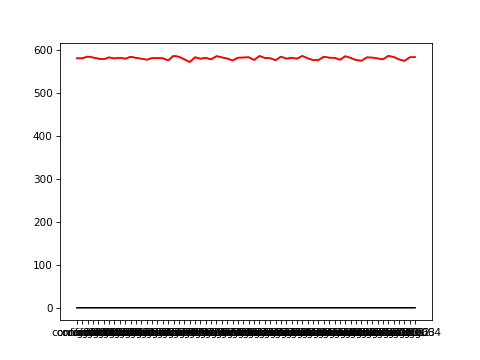

In [37]:
pl.figure()
pl.plot(df.get_group(0).groupby(['config'])['dff'].mean(), 'k')
pl.plot(df2[[0, 'config']].groupby(['config']).mean(), 'r')


In [39]:
df2[[0, 'config']].groupby(['config']).mean()

,0
config,
config001,580.644114
config002,580.701034
config003,584.756176
config004,582.498522
config005,579.821492
...,...
config060,583.785921
config061,578.067694
config062,574.769184
